In [1]:
import sys
print(sys.version)

3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]


In [171]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error
from preprocessor import Preprocessor
import scipy.sparse as sp
from enums import TextNormalizationStrategy

# Define the path to your data file
# data_file_path = "C:\\Users\\Saad\\Desktop\\Study\\Saad Learnings\\Python\\School Python\\Intro to AI Assignments\\Assignments\\Project\\Software_5-core.json"
data_file_path = "C:\\Users\\sa909892\\Learnings\\a_Learnings\\New folder\\Project\\Software_5-core.json"

reviews = pd.read_json(data_file_path, lines = True) #Convert the list of dictionaries into a pandas DataFrame
reviews = Preprocessor.preprocess_reviews(reviews, text_normalization_strategy= TextNormalizationStrategy.STEMMING)

print(reviews.columns)

# what I need in the data: "overall": 5.0 (stars), "vote": "3" (helpful button), "verified": false (real person)
print(df.head())


[INFO] 2024-04-15 15:37:42 - preprocessor: Preprocessing data.


Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image', 'reviewLength', 'reviewAge', 'voteStd', 'reviewLengthStd',
       'reviewAgeStd', 'cleanedReviewText'],
      dtype='object')
               overall  verified           reviewTime      reviewerID  \
asin                                                                    
0321700945 11        5         0  2010-10-13 00:00:00  A13700AF4X40YG   
           12        5         0  2010-10-07 00:00:00  A23E9QQHJLNGUI   
           13        5         0  2011-05-15 00:00:00  A1GQRGB8FGSLIZ   
           14        3         0  2011-01-09 00:00:00  A1E50L7PCVXLN4   
           15        5         0  2010-12-06 00:00:00  A10Y058K7B96C6   

                     asin                    style       reviewerName  \
asin                                                                    
0321700945 11  0321700945  {'Format:': ' DVD-ROM'} 

In [174]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [175]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [176]:
from scipy.sparse import hstack
tfidf_vectorizer = TfidfVectorizer(lowercase=False, analyzer="word") 
review_vectors = tfidf_vectorizer.fit_transform(reviews["cleanedReviewText"])

x_data = hstack([review_vectors, reviews["verified"].values[:, None], reviews["reviewAgeStd"].values[:, None],
                reviews["reviewLengthStd"].values[:, None], reviews["overall"].values[:, None]])
y_data = reviews["voteStd"]
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=1)


svr_model = SVR(kernel='linear')# Initialize the SVR model for linear

svr_model.fit(X_train, y_train)# Train the SVR model on the training data

y_pred = svr_model.predict(X_test)# Make predictions on the testing data

mse = mean_squared_error(y_test, y_pred)# Calculate the mean squared error of the model
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 0.4186


In [177]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)# Calculate the mean absolute error of the model
print(f"Mean Absolute Error: {mae:.4f}")

Mean Absolute Error: 0.3685


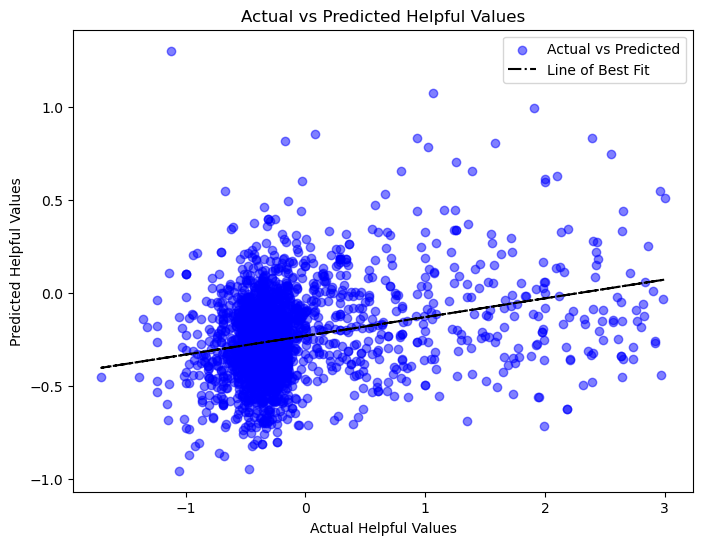

In [178]:
import matplotlib.pyplot as plt
import numpy as np

coefficients = np.polyfit(y_test, y_pred, 1) # Fit a linear regression model
line_of_best_fit = np.polyval(coefficients, y_test)

# Plot actual vs predicted helpfulness ratings with the linear line
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Actual vs Predicted')
plt.plot(y_test, line_of_best_fit, color='k',linestyle='-.', label='Line of Best Fit')
plt.title('Actual vs Predicted Helpful Values')
plt.xlabel('Actual Helpful Values')
plt.ylabel('Predicted Helpful Values')
plt.legend()
plt.show()